In [110]:
from sklearn.datasets import make_blobs
X,y = make_blobs(
    n_samples=[40,30,30],
    centers=[[-2,3],[3,1.5],[2,-2]],
    cluster_std=[0.5,0.9,1.5],
    random_state = 19716
    )

In [124]:
from sklearn import datasets
digits = datasets.load_digits(as_frame=True)["frame"]
X = digits.drop("target",axis="columns")
y = digits["target"]
X.shape

(1797, 64)

In [125]:
digits["sil"] = silhouette_samples(X,y)
digits.groupby("target")["sil"].mean()


target
0    0.360899
1    0.052275
2    0.144076
3    0.150767
4    0.165170
5    0.119483
6    0.287638
7    0.193736
8    0.084882
9    0.071171
Name: sil, dtype: float64

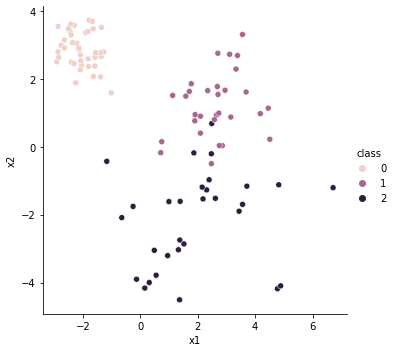

In [111]:
import pandas as pd
import seaborn as sns
blobs = pd.DataFrame({"x1":X[:,0],"x2":X[:,1],"class":y})
sns.relplot(data=blobs,x="x1",y="x2",hue="class");

In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=10)
km.fit(X)

digits["km"] = km.predict(X)
digits["sil"] = silhouette_samples(X,digits["km"])
digits.groupby("target")["sil"].mean()


target
0    0.363384
1    0.226269
2    0.164653
3    0.147856
4    0.172816
5    0.151843
6    0.285115
7    0.172798
8    0.065968
9    0.133518
Name: sil, dtype: float64

In [116]:
blobs.groupby("km3")["sil"].mean()


km3
0    0.401121
1    0.493170
2    0.793501
Name: sil, dtype: float64

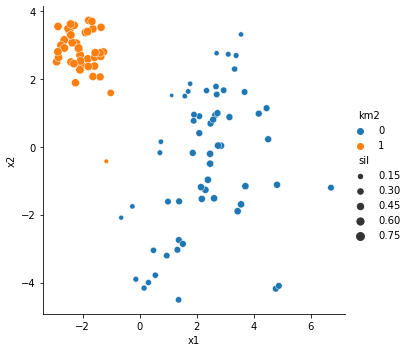

In [119]:
km = KMeans(n_clusters=2)
km.fit(X)

blobs["km2"] = km.predict(X)
blobs["sil"] = silhouette_samples(X,blobs["km2"])
sns.relplot(data=blobs,x="x1",y="x2",hue="km2",size=blobs["sil"]);


In [120]:
blobs.groupby("km2")["sil"].mean()


km2
0    0.456869
1    0.813098
Name: sil, dtype: float64

In [95]:
from sklearn.metrics import silhouette_samples
blobs["sil"] = silhouette_samples(X,y)

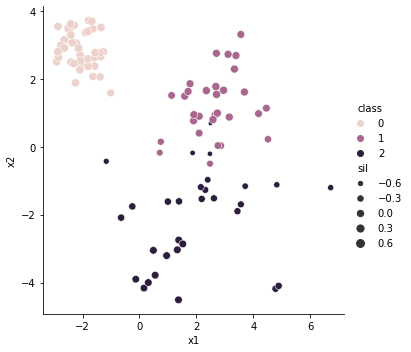

In [96]:
sns.relplot(data=blobs,x="x1",y="x2",hue="class",size="sil");


In [97]:
blobs.groupby("class")["sil"].mean()

class
0    0.812718
1    0.551222
2    0.223225
Name: sil, dtype: float64

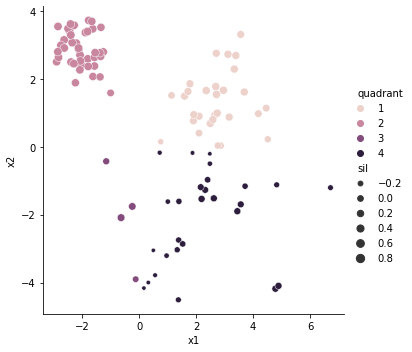

In [98]:
def quad(x,y):
    if x > 0:
        if y > 0: return 1
        else: return 4
    else:
        if y > 0: return 2
        else: return 3

blobs["quadrant"] = [quad(x,y) for (x,y) in zip(blobs.x1,blobs.x2)]
blobs["sil"] = silhouette_samples(X,blobs["quadrant"])
sns.relplot(data=blobs,x="x1",y="x2",hue="quadrant",size="sil");


In [99]:
blobs.groupby("quadrant")["sil"].mean()

quadrant
1    0.578120
2    0.808252
3    0.409983
4    0.043896
Name: sil, dtype: float64

In [133]:
from sklearn.metrics import adjusted_rand_score


print(f"ARI: {adjusted_rand_score(y,digits["km"]):.4f}")


SyntaxError: invalid syntax (2136937355.py, line 4)

In [38]:

# digits["km8"] = km.predict(X)
# digits["sil_kmeans"] = silhouette_samples(X,digits["km8"])
# digits.groupby("km8")["sil_kmeans"].mean()

KMeans(n_clusters=3)

<AxesSubplot:>

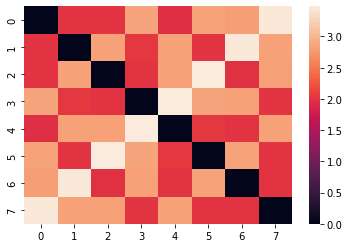

In [105]:
from sklearn.metrics import pairwise_distances

X = [
    [-1.01,-1,-.98],[1,-1.02,-1],[-.98,1,-.99],[1.01,1.01,-1], 
    [-1.01,-1.01,.99],[1.02,-1.02,1],[-.99,.98,.99],[1,.98,1], 
]

D2 = pairwise_distances(X,metric="euclidean")
sns.heatmap(D2)


<AxesSubplot:>

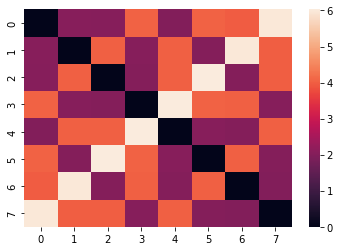

In [109]:
D1 = pairwise_distances(X,metric="manhattan")
sns.heatmap(D1)

<AxesSubplot:>

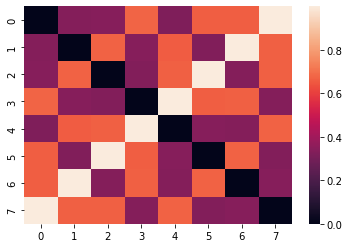

In [108]:
Dc = pairwise_distances(X,metric="cosine")/2
sns.heatmap(Dc)


In [146]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,sil,km,sil_true,sil_kmeans,km8
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0,0.447893,2,0.434847,0.446707,1
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,16.0,10.0,0.0,0.0,1,0.308790,0,0.190509,0.177047,6
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,11.0,16.0,9.0,0.0,2,-0.055154,5,-0.064801,0.141944,6
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,13.0,9.0,0.0,0.0,3,0.144942,1,0.202155,0.135412,2
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,16.0,4.0,0.0,0.0,4,0.179017,6,0.160590,0.182469,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,15.0,9.0,0.0,0.0,9,0.138904,1,0.197728,0.130736,2
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,14.0,6.0,0.0,0.0,0,0.407080,2,0.407905,0.406614,1
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,13.0,6.0,0.0,0.0,8,-0.025123,5,0.119982,0.163560,6
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,16.0,12.0,0.0,0.0,9,0.014681,1,0.073560,0.018510,2


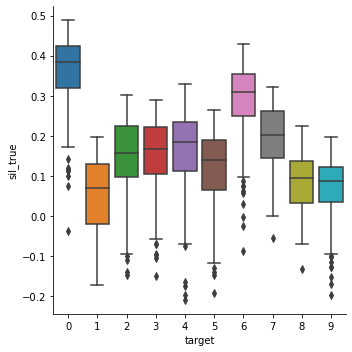

In [170]:
sns.catplot(data=digits,y="sil_true",x="target",kind="box")

In [192]:
from sklearn.metrics import pairwise_distances
import seaborn as sns
import numpy as np

X = np.array([[-2,-1],[1,-1],[1,0],[0,2],[-1,0]])
D2 = pairwise_distances(X,metric="euclidean")
D2

array([[0.        , 3.        , 3.16227766, 3.60555128, 1.41421356],
       [3.        , 0.        , 1.        , 3.16227766, 2.23606798],
       [3.16227766, 1.        , 0.        , 2.23606798, 2.        ],
       [3.60555128, 3.16227766, 2.23606798, 0.        , 2.23606798],
       [1.41421356, 2.23606798, 2.        , 2.23606798, 0.        ]])

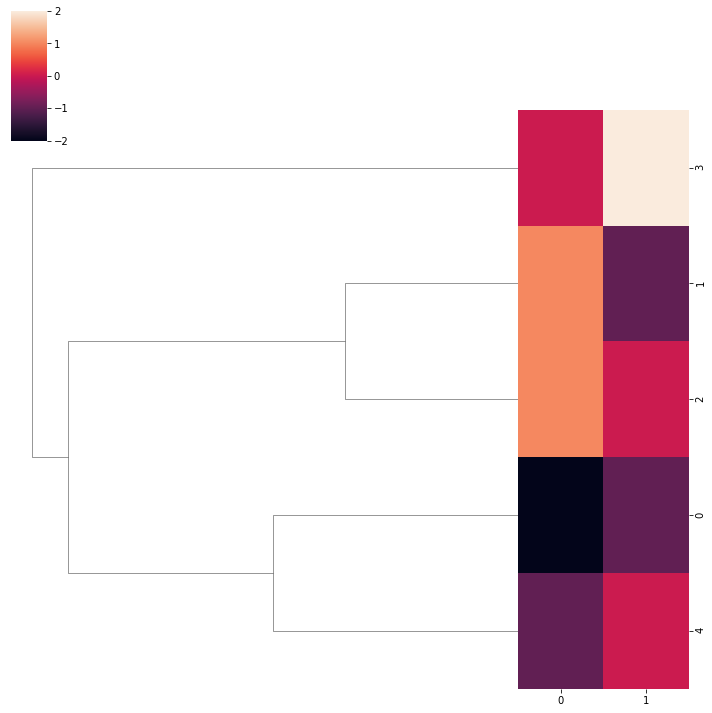

In [213]:
sns.clustermap(X,col_cluster=False,dendrogram_ratio=(.75,.15))

In [200]:
from numpy.linalg import norm
C1 = X[[1,2]]
for x in X[[0,3,4]]:
    print(min(norm(x-y) for y in C1))

3.0
2.23606797749979
2.0


In [196]:
pairwise_distances(X[0],C1)

ValueError: Expected 2D array, got 1D array instead:
array=[-2. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [185]:
idx=[1,2]
X[idx]

TypeError: list indices must be integers or slices, not list

In [189]:
norm(C1[0]-X[0])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [190]:
C1[0]

[1, -1]

In [191]:
X[0]

[-2, -1]

In [65]:
import pandas as pd
penguins = pd.read_csv("https://www.openml.org/data/get_csv/41/dataset_41_glass.arff")
# X = gas.drop("Class",axis="columns")
X = penguins.drop("Type",axis=1)

In [55]:
import seaborn as sns
penguins = sns.load_dataset("mpg").dropna()
X = penguins[["displacement","horsepower","weight","acceleration","mpg"]]
# X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
penguins

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [44]:
from sklearn import datasets
penguins = datasets.load_wine(as_frame=True)["frame"]
X = penguins.drop("target",axis="columns")

In [67]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=7,linkage="single")
agg.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=7)

In [68]:
from sklearn.metrics import silhouette_samples
penguins["agg"] = agg.labels_
penguins["sil"] = silhouette_samples(X,agg.labels_)


In [69]:
print(penguins["agg"].value_counts())

0    207
1      2
5      1
3      1
6      1
4      1
2      1
Name: agg, dtype: int64


In [70]:
agg = AgglomerativeClustering(n_clusters=7,linkage="ward")
agg.fit(X)
penguins["agg"] = agg.labels_
penguins["sil"] = silhouette_samples(X,penguins["agg"])
penguins["agg"].value_counts()


1    130
0     32
3     24
4     17
2      6
5      3
6      2
Name: agg, dtype: int64

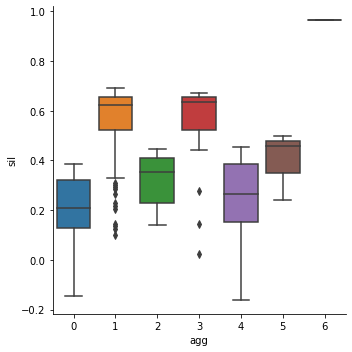

In [72]:
import seaborn as sns
sns.catplot(data=penguins,x="agg",y="sil",kind="box");


In [74]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(penguins["Type"],agg.labels_)

0.2620183917864067

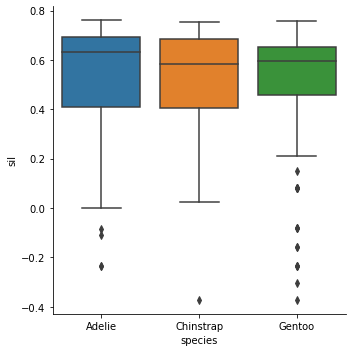

In [36]:
sns.catplot(data=penguins,x="species",y="sil",kind="box");


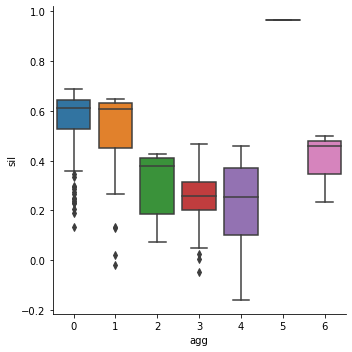

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)
km.fit(X)
penguins["agg"] = km.labels_
penguins["sil"] = silhouette_samples(X,penguins["agg"])
sns.catplot(data=penguins,x="agg",y="sil",kind="box");
